![head.png](https://github.com/cafawo/FinancialDataAnalytics/blob/master/figures/head.jpg?raw=1)

# Financial Data Analytics in Python

**Prof. Dr. Fabian Woebbeking**</br>
Assistant Professor of Financial Economics

IWH - Leibniz Institute for Economic Research</br>
MLU - Martin Luther University Halle-Wittenberg

fabian.woebbeking@iwh-halle.de

# Homework: data management

You will need a Git/GitHub repository to submit your course deliverables. Consult [**slides.ipynb**](https://github.com/cafawo/FinancialDataAnalytics) for help with the tasks below! If you need further assistance, do not hesitate to open a Q&A at https://github.com/cafawo/FinancialDataAnalytics/discussions

### Task: 

Use Deribit's `"/public/get_tradingview_chart_data"` API endpoint to download historical price data for **"BTC-PERPETUAL"** with a resolution of $60$ minutes, reaching as far back as possible.

Hint: https://docs.deribit.com/#public-get_tradingview_chart_data

In [1]:
import requests
import time

def get_historical_data(instrument_name, resolution, start_timestamp, end_timestamp):
    url = "https://www.deribit.com/api/v2/public/get_tradingview_chart_data"
    params = {
        'instrument_name': instrument_name,
        'resolution': resolution,
        'start_timestamp': start_timestamp,
        'end_timestamp': end_timestamp
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Parameters
instrument_name = "BTC-PERPETUAL"
resolution = "60"
end_timestamp = int(time.time() * 1000)  # current time in milliseconds
start_timestamp = 0  # as far back as possible

# Fetch the data
historical_data = get_historical_data(instrument_name, resolution, start_timestamp, end_timestamp)

# Check the fetched data
print(historical_data)

# To process the data further, you can convert it into a pandas DataFrame
import pandas as pd

if 'result' in historical_data:
    df = pd.DataFrame(historical_data['result'])
    print(df.head())
else:
    print("Error fetching data:", historical_data)


{'usOut': 1717525996085515, 'usIn': 1717525996038051, 'usDiff': 47464, 'testnet': False, 'result': {'volume': [874.14003392, 874.78871458, 875.69931157, 1851.87778275, 5158.29025435, 5428.8084136, 6496.64099387, 1721.32093435, 509.61319911, 492.5559502, 964.83746559, 994.01122665, 499.88669272, 516.83091002, 865.6717197, 385.94376126, 405.74077417, 403.92436187, 390.58935427, 248.0708485, 332.83356699, 1636.23590355, 1224.04651235, 362.5711315, 326.59367709, 962.07719196, 846.29758964, 665.62946455, 762.84566156, 754.14901455, 1379.39106665, 446.91361563, 226.25133237, 262.59996056, 518.19648782, 262.47235134, 603.91182599, 263.69792238, 215.24005042, 474.18033761, 417.74677277, 99.35837704, 137.77285682, 207.5498882, 105.98574181, 682.3297399, 390.97803049, 385.66219407, 103.64251135, 110.19613424, 174.32279393, 168.9001983, 215.2247014, 151.8099596, 120.71434565, 121.14472467, 65.11320164, 74.19464592, 274.01279321, 181.91851925, 651.33582861, 260.06898817, 310.7265814, 108.00882039,

### Task: 

Create a Pandas data frame called "ohlc" with the price data from above. Add the following columns:
```Python
ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
ohlc['instrument_name'] = "BTC-PERPETUAL"
ohlc['resolution'] = 60
```

Save `ohlc` into a table of the same name inside a database called "07_datam.db".


In [2]:
import requests
import time
import pandas as pd
import sqlite3

# Function to fetch historical data
def get_historical_data(instrument_name, resolution, start_timestamp, end_timestamp):
    url = "https://www.deribit.com/api/v2/public/get_tradingview_chart_data"
    params = {
        'instrument_name': instrument_name,
        'resolution': resolution,
        'start_timestamp': start_timestamp,
        'end_timestamp': end_timestamp
    }
    response = requests.get(url, params=params)
    data = response.json()
    return data

# Parameters
instrument_name = "BTC-PERPETUAL"
resolution = "60"
end_timestamp = int(time.time() * 1000)  # current time in milliseconds
start_timestamp = 0  # as far back as possible

# Fetch the data
historical_data = get_historical_data(instrument_name, resolution, start_timestamp, end_timestamp)

# Check if data is fetched successfully
if 'result' in historical_data:
    ohlc = pd.DataFrame(historical_data['result'])
    
    # Add the required columns
    ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
    ohlc['instrument_name'] = instrument_name
    ohlc['resolution'] = int(resolution)
    
    # Save the DataFrame to a SQLite database
    conn = sqlite3.connect('07_datam.db')
    ohlc.to_sql('ohlc', conn, if_exists='replace', index=False)
    conn.close()
    
    print("Data saved successfully to 07_datam.db")
else:
    print("Error fetching data:", historical_data)


Data saved successfully to 07_datam.db


### Task: 

Create a Python `class DataHandler` that connects to 07_datam.db. The class should have functions that:
* download and save,
* select and return, and
* display data as a plot (e.g. the last price over time).

Data saved successfully to the database.
        volume          ticks status     open      low     high         cost  \
0   874.140034  1699524000000     ok  36873.0  36751.5  37036.5   32239310.0   
1   874.788715  1699527600000     ok  36792.5  36682.5  36838.0   32136020.0   
2   875.699312  1699531200000     ok  36835.5  36792.5  37072.5   32347530.0   
3  1851.877783  1699534800000     ok  36920.5  36862.0  37222.5   68497090.0   
4  5158.290254  1699538400000     ok  37218.0  37213.0  38100.0  194343520.0   

     close            timestamp instrument_name  resolution  
0  36797.0  2023-11-09 10:00:00   BTC-PERPETUAL          60  
1  36835.5  2023-11-09 11:00:00   BTC-PERPETUAL          60  
2  36918.0  2023-11-09 12:00:00   BTC-PERPETUAL          60  
3  37218.5  2023-11-09 13:00:00   BTC-PERPETUAL          60  
4  37917.0  2023-11-09 14:00:00   BTC-PERPETUAL          60  


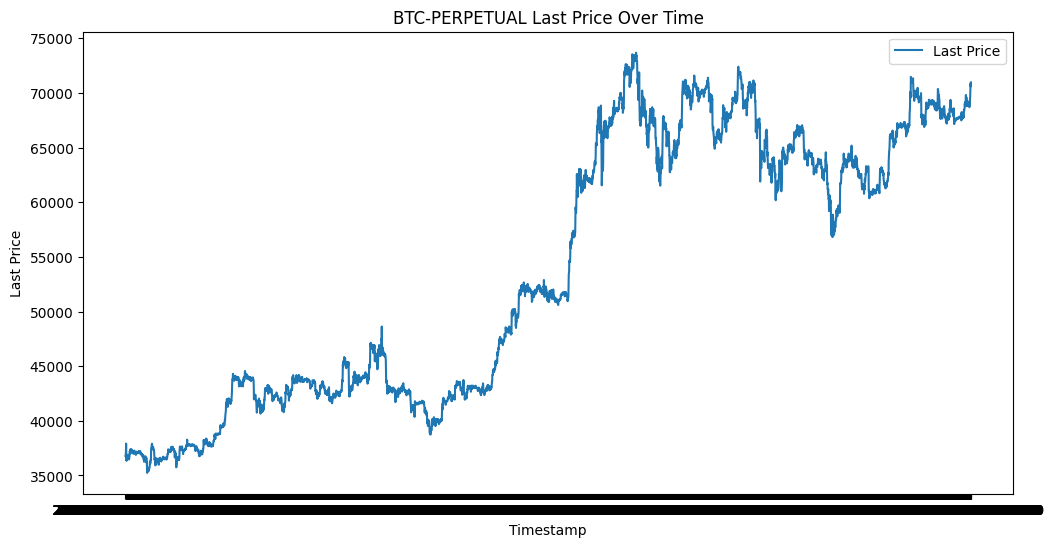

In [3]:
import requests
import time
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

class DataHandler:
    def __init__(self, db_name):
        self.db_name = db_name

    def _connect(self):
        """Create a connection to the SQLite database."""
        conn = sqlite3.connect(self.db_name)
        return conn

    def download_and_save(self, instrument_name, resolution):
        """Download historical data and save to the database."""
        end_timestamp = int(time.time() * 1000)  # current time in milliseconds
        start_timestamp = 0  # as far back as possible

        data = self._get_historical_data(instrument_name, resolution, start_timestamp, end_timestamp)
        if 'result' in data:
            ohlc = pd.DataFrame(data['result'])
            ohlc['timestamp'] = pd.to_datetime(ohlc['ticks'], unit='ms')
            ohlc['instrument_name'] = instrument_name
            ohlc['resolution'] = int(resolution)
            
            conn = self._connect()
            ohlc.to_sql('ohlc', conn, if_exists='replace', index=False)
            conn.close()
            print("Data saved successfully to the database.")
        else:
            print("Error fetching data:", data)
    
    def _get_historical_data(self, instrument_name, resolution, start_timestamp, end_timestamp):
        """Fetch historical data from the API."""
        url = "https://www.deribit.com/api/v2/public/get_tradingview_chart_data"
        params = {
            'instrument_name': instrument_name,
            'resolution': resolution,
            'start_timestamp': start_timestamp,
            'end_timestamp': end_timestamp
        }
        response = requests.get(url, params=params)
        data = response.json()
        return data

    def select_and_return(self):
        """Select data from the database and return as a DataFrame."""
        conn = self._connect()
        query = "SELECT * FROM ohlc"
        df = pd.read_sql(query, conn)
        conn.close()
        return df

    def display_data_plot(self):
        """Display a plot of the last price over time."""
        df = self.select_and_return()
        plt.figure(figsize=(12, 6))
        plt.plot(df['timestamp'], df['close'], label='Last Price')
        plt.xlabel('Timestamp')
        plt.ylabel('Last Price')
        plt.title('BTC-PERPETUAL Last Price Over Time')
        plt.legend()
        plt.show()

# Usage example
data_handler = DataHandler('07_datam.db')
data_handler.download_and_save("BTC-PERPETUAL", 60)
df = data_handler.select_and_return()
print(df.head())
data_handler.display_data_plot()
